# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fatih Ulwan Annaufal
- **Email:** fatih.ulwan@gmail.com
- **ID Dicoding:** tatangmengkudu

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan **Bike-sharing** berdasarkan musim, dan apakah ada perbedaan yang signifikan antara musim-musim tersebut?
- Bagaimana hubungan antara variabel cuaca dengan jumlah pengguna **Bike-sharing**? Apakah cuaca berpengaruh signifikan terhadap tingkat penggunaan **Bike-sharing**?

## Import Semua Packages/Library yang Digunakan

In [493]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Data Wrangling

### Gathering Data

In [494]:
dir = 'data'
day_df = pd.read_csv(os.path.join(dir, 'day.csv'))
#check random rows
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
625,626,2012-09-17,3,1,9,0,1,1,2,0.580833,0.553050,0.734583,0.151742,1022,5847,6869
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
220,221,2011-08-09,3,0,8,0,2,1,1,0.775000,0.724121,0.570417,0.151121,907,3695,4602
706,707,2012-12-07,4,1,12,0,5,1,2,0.320833,0.321958,0.764167,0.130600,349,4659,5008
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845


In [495]:
hour_df = pd.read_csv(os.path.join(dir, 'hour.csv'))
#check random rows
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11053,11054,2012-04-10,2,1,4,17,0,2,1,1,0.56,0.5303,0.21,0.5224,88,656,744
11389,11390,2012-04-24,2,1,4,18,0,2,1,1,0.50,0.4848,0.18,0.0000,52,580,632
10357,10358,2012-03-12,1,1,3,16,0,1,1,1,0.62,0.6212,0.35,0.4478,77,255,332
12142,12143,2012-05-26,2,1,5,3,0,6,0,1,0.62,0.5606,0.88,0.1045,9,22,31
3183,3184,2011-05-17,2,0,5,13,0,2,1,2,0.56,0.5303,0.88,0.3284,31,141,172


### Assessing Data

In [496]:
#checking day dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There is 731 rows with 16 columns in day.csv data. All of the data seems normal, but to make sure we will check if there's any missing value.

In [497]:
#checking for missing values in day dataset
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Great! no missing value in this dataset!!

In [498]:
#summary statistics of day dataset
day_df.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Checking summary of the whole data. Here we can focus on **season** columns, we can see we have 4 seasons in this dataset to work for the question 1.

In [499]:
#checking hour dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


For dataset hour.csv we have 17379 rows and 17 columns. The data seems normal but just in case we still going to check for missing value.

In [500]:
#checking for missing values in hour dataset
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing value! nice, easier work to be done.

In [501]:
#summary statistics of hour dataset
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Focusing on **weathersit** to work for the question 2, here we also have 4 types of weathers.

# Cleaning data

No missing value to work for, but here we convert **season** and **weathersit** from numerical into corresponding weather name for a clearer understanding.

In [502]:
#Convert numerical season values to corresponding season names
day_df['season'] = day_df['season'].map({
    1: 'spring', 
    2: 'summer', 
    3: 'fall', 
    4: 'winter'
})

In [503]:
#Convert numerical weather values to corresponding weather names
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear', 
    2: 'Mist', 
    3: 'Light Rain', 
    4: 'Heavy Rain / Thunderstorm'
})

## Exploratory Data Analysis (EDA)

In [504]:
merge_df = pd.DataFrame(hour_df.merge(day_df, on="dteday", how="left"))
merge_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
13668,13669,2012-07-28,3,1,7,17,0,6,0,Clear,...,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,4451,6685
13516,13517,2012-07-22,3,1,7,9,0,0,0,Mist,...,0,0,2,0.667500,0.623125,0.762500,0.093921,2544,4866,7410
2910,2911,2011-05-06,2,0,5,4,0,5,1,Clear,...,5,1,1,0.479167,0.474117,0.590000,0.228246,894,3714,4608
14407,14408,2012-08-28,3,1,8,12,0,2,1,Clear,...,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
16662,16663,2012-12-02,4,1,12,1,0,0,0,Mist,...,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649


In [505]:
#Checking the mean count of bikes rented per season
merge_df.groupby(
    by="season_y").cnt_y.mean().sort_values(ascending=False).reset_index()

,season_y,cnt_y
0,fall,5654.093194
1,summer,4995.253119
2,winter,4765.366021
3,spring,2635.348185


In [506]:
#Checking the mean count of bikes rented per weather
merge_df.groupby(
    by="weathersit_x").cnt_y.mean().sort_values(ascending=False).reset_index()

,weathersit_x,cnt_y
0,Clear,4804.872864
1,Mist,4249.872799
2,Light Rain,3268.097956
3,Heavy Rain / Thunderstorm,1394.333333


In [507]:
merge_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis


### Question 1: Bagaimana tren penggunaan **Bike-sharing** berdasarkan musim, dan apakah ada perbedaan yang signifikan antara musim-musim tersebut?

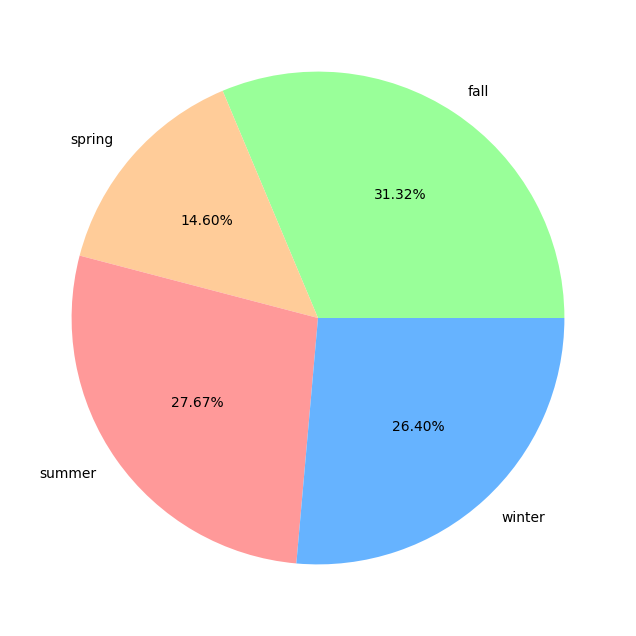

In [508]:
#Make a visualization of the mean count of bikes rented per season
def plot_season(df: pd.DataFrame, count='cnt_y'):
    df = df.copy()
    df_pie = df.groupby('season_y').mean(numeric_only=True)[count]
    plt.figure(figsize=(8, 8))
    plt.pie(df_pie, labels=df_pie.index, autopct='%.2f%%', colors=['#99ff99','#ffcc99','#ff9999','#66b3ff'])
    plt.show()

plot_season(merge_df)

### Question 2: Bagaimana hubungan antara variabel cuaca dengan jumlah pengguna **Bike-sharing**? Apakah cuaca berpengaruh signifikan terhadap tingkat penggunaan **Bike-sharing**?

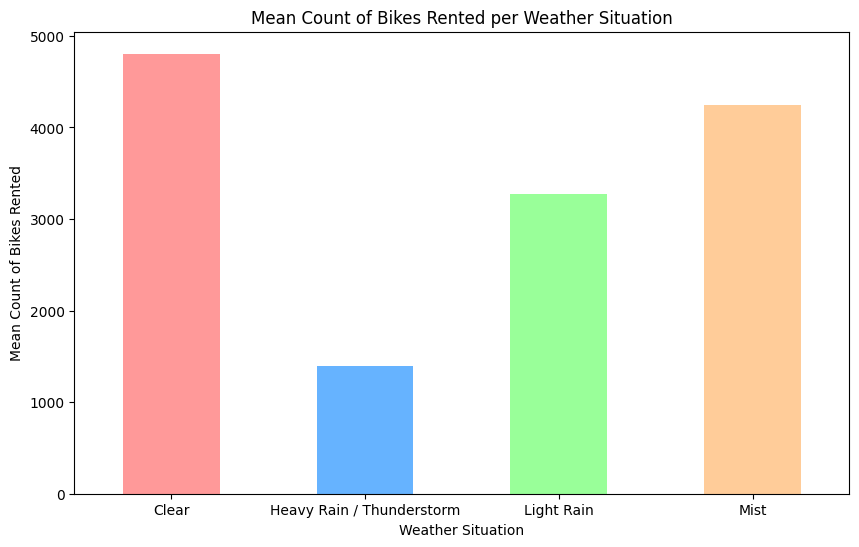

In [509]:
#Make a visualization of the mean count of bikes rented per weather
def plot_weather(df: pd.DataFrame, count='cnt_y'):
    df = df.copy()
    df_bar = df.groupby('weathersit_x').mean(numeric_only=True)[count]

    plt.figure(figsize=(10, 6))
    df_bar.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title(f'Mean Count of Bikes Rented per Weather Situation')
    plt.xlabel('Weather Situation')
    plt.ylabel(f'Mean Count of Bikes Rented')
    plt.xticks(rotation=0)
    plt.show()

plot_weather(merge_df)

## Conclusion

- Conclusion Question 1: Secara signifikan, terdapat perbedaan dalam pola penggunaan Bike-sharing berdasarkan musim. Musim gugur (fall) mencatat tingkat penggunaan tertinggi dengan peningkatan sebesar 31%, diikuti oleh musim panas (summer) dengan peningkatan 28%, musim dingin (winter) sebesar 26%, dan musim semi (spring) sebesar 15%. Hasil ini menunjukkan bahwa preferensi pengguna Bike-sharing berfluktuasi seiring pergantian musim, dengan musim gugur menjadi pilihan utama.

- Conclusion Question 2: Data menunjukkan korelasi antara kondisi cuaca dan jumlah pengguna Bike-sharing. Cuaca cerah (clear) mencatat jumlah pengguna tertinggi, sementara cuaca badai (Thunderstorm) memiliki jumlah pengguna paling sedikit. Hasil ini menegaskan bahwa cuaca memainkan peran penting dalam menentukan tingkat pemanfaatan layanan Bike-sharing, dengan preferensi yang jelas terhadap hari-hari dengan kondisi cuaca yang baik.